In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow torch transformers joblib --quiet


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib


In [4]:
# Load dataset from local Colab path
df = pd.read_csv("/content/Tweets.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
print(pd.read_csv("/content/Tweets.csv").columns)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


/tmp/ipython-input-2205542357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline_sentiment", data=df, palette="Set2")


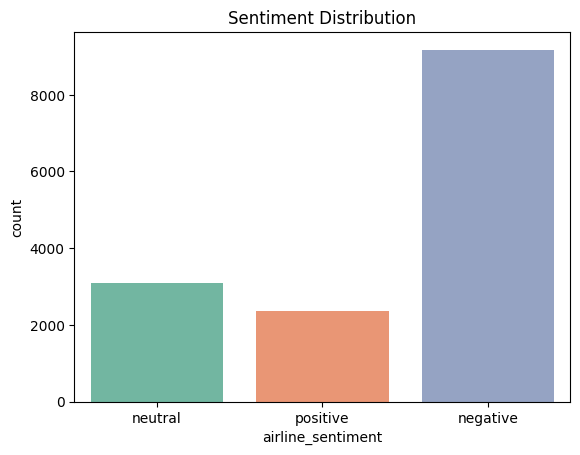

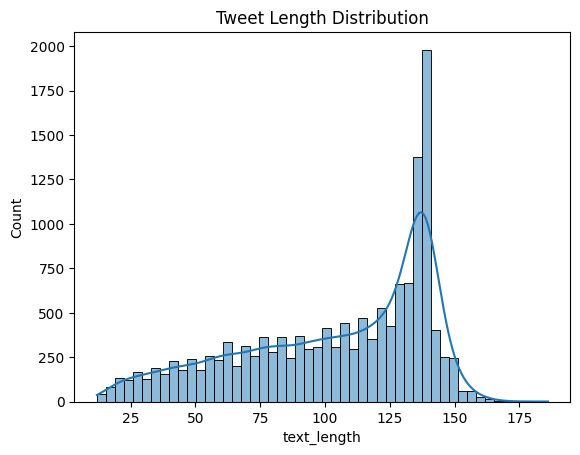

In [6]:
print(df['airline_sentiment'].value_counts())

# Sentiment distribution
sns.countplot(x="airline_sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

# Word length distribution
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.show()


In [7]:
X = df['text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [40]:
from sklearn.metrics import accuracy_score, f1_score

acc_tfidf = accuracy_score(y_test, y_pred)
f1_tfidf = f1_score(y_test, y_pred, average="macro")

print(" TF-IDF metrics saved for Gradio:", acc_tfidf, f1_tfidf)


✅ TF-IDF metrics saved for Gradio: 0.7817622950819673 0.6980770129949535


In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7817622950819673

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1835
     neutral       0.64      0.48      0.55       620
    positive       0.82      0.58      0.68       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Import Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Consistent label encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Tokenize & pad
tokenizer_keras = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer_keras.fit_on_texts(X_train)

X_train_seq = tokenizer_keras.texts_to_sequences(X_train)
X_test_seq = tokenizer_keras.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=150, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=150, padding="post")

# Build GRU
gru_model = Sequential([
    Embedding(20000, 128, input_length=150),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(len(label_encoder.classes_), activation="softmax")
])

gru_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train GRU
gru_model.fit(X_train_pad, y_train_enc, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Predict
y_pred_gru = gru_model.predict(X_test_pad).argmax(axis=1)

#  Evaluate
print(" GRU Accuracy:", accuracy_score(y_test_enc, y_pred_gru))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_gru, target_names=label_encoder.classes_))




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 171s 532ms/step - accuracy: 0.6285 - loss: 0.9308 - val_accuracy: 0.6236 - val_loss: 0.9239
Epoch 2/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 124s 424ms/step - accuracy: 0.6338 - loss: 0.9110 - val_accuracy: 0.6236 - val_loss: 0.9261
Epoch 3/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 123s 421ms/step - accuracy: 0.6354 - loss: 0.9116 - val_accuracy: 0.6236 - val_loss: 0.9195
Epoch 4/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 129s 440ms/step - accuracy: 0.6323 - loss: 0.9116 - val_accuracy: 0.6236 - val_loss: 0.9266
Epoch 5/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 137s 422ms/step - accuracy: 0.6264 - loss: 0.9184 - val_accuracy: 0.6236 - val_loss: 0.9217
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step
 GRU Accuracy: 0.6267076502732241

Classification Report:
               precision    recall  f1-score   support

    negative       0.63      1.00      0.77      1835
     neutral       0.00      0.00      0.00       620
    positive       0.00      0.00      0.00       473

    accuracy              

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
import os
os.environ["WANDB_DISABLED"] = "true"


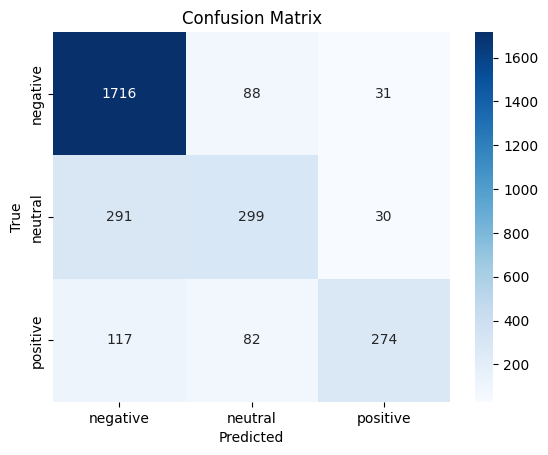

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [44]:

acc_gru = accuracy_score(y_test_enc, y_pred_gru)
f1_gru = f1_score(y_test_enc, y_pred_gru, average="macro")

print(" GRU metrics saved for Gradio:", acc_gru, f1_gru)


✅ GRU metrics saved for Gradio: 0.6267076502732241 0.256840926586885


In [12]:
joblib.dump(model, "airline_sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully ")


Model and vectorizer saved successfully ✅


In [13]:
!pip install transformers datasets --quiet
!pip install --upgrade transformers --quiet



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 133.6 MB/s eta 0:00:00


In [14]:
import torch
from torch.utils.data import DataLoader
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder


In [15]:
# Encode text labels into numeric values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['airline_sentiment'])

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)


In [16]:
# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Tokenize training and test data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [17]:
import torch
from torch.utils.data import Dataset

# Custom dataset wrapper
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Create datasets from your encodings and labels
train_dataset = SentimentDataset(train_encodings, list(train_labels))
test_dataset  = SentimentDataset(test_encodings, list(test_labels))


In [18]:
from transformers import DistilBertForSequenceClassification, TrainingArguments, Trainer

# Load model (make sure num_labels matches your dataset classes)
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3   # change this if your dataset has a different number of classes
)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    push_to_hub=False,
    report_to="none"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-255611007.py:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [19]:
trainer.train()


Step,Training Loss
50,0.790200
100,0.543600
150,0.522300
200,0.498900
250,0.498400
300,0.502300
350,0.492700
400,0.425300
450,0.445600
500,0.491700


TrainOutput(global_step=3660, training_loss=0.22057451456886987, metrics={'train_runtime': 427.5334, 'train_samples_per_second': 136.972, 'train_steps_per_second': 8.561, 'total_flos': 939376192861440.0, 'train_loss': 0.22057451456886987, 'epoch': 5.0})

In [20]:
results = trainer.evaluate()
print(" Evaluation Results:", results)

 Evaluation Results: {'eval_loss': 0.9372411966323853, 'eval_runtime': 5.8375, 'eval_samples_per_second': 501.582, 'eval_steps_per_second': 31.349, 'epoch': 5.0}


In [21]:
def predict_sentiment(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Move inputs to same device as model
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    outputs = model(**inputs)

    predictions = torch.argmax(outputs.logits, dim=1).item()
    sentiment = label_encoder.inverse_transform([predictions])[0]
    return sentiment

# Test with your own sentences
examples = [
    "The flight was amazing, crew was super friendly!",
    "I had a terrible experience, never flying this airline again.",
    "The flight was okay, nothing special."
]

for ex in examples:
    print(f"Text: {ex}")
    print("Predicted Sentiment:", predict_sentiment(ex))
    print("-----------")


Text: The flight was amazing, crew was super friendly!
Predicted Sentiment: positive
-----------
Text: I had a terrible experience, never flying this airline again.
Predicted Sentiment: negative
-----------
Text: The flight was okay, nothing special.
Predicted Sentiment: negative
-----------


In [22]:
# Save model and tokenizer locally
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")

print(" Model and tokenizer saved!")


 Model and tokenizer saved!


In [23]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

# Load saved model
loaded_model = DistilBertForSequenceClassification.from_pretrained("./sentiment_model")
loaded_tokenizer = DistilBertTokenizerFast.from_pretrained("./sentiment_model")

# Put on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

def predict_with_loaded(text):
    inputs = loaded_tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    outputs = loaded_model(**inputs)
    pred = torch.argmax(outputs.logits, dim=1).item()
    sentiment = label_encoder.inverse_transform([pred])[0]
    return sentiment

print(" Reloaded model ready for predictions!")


 Reloaded model ready for predictions!


In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
# Path where you want to save inside your Google Drive
save_path = "/content/drive/MyDrive/sentiment_model"

model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f" Model and tokenizer saved to: {save_path}")


 Model and tokenizer saved to: /content/drive/MyDrive/sentiment_model


In [26]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

load_path = "/content/drive/MyDrive/sentiment_model"

loaded_model = DistilBertForSequenceClassification.from_pretrained(load_path)
loaded_tokenizer = DistilBertTokenizerFast.from_pretrained(load_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

def predict_from_drive(text):
    inputs = loaded_tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    outputs = loaded_model(**inputs)
    pred = torch.argmax(outputs.logits, dim=1).item()
    sentiment = label_encoder.inverse_transform([pred])[0]
    return sentiment

print(" Model reloaded from Drive and ready to use!")


 Model reloaded from Drive and ready to use!


In [27]:
#  Interactive prediction
while True:
    user_input = input("Enter a tweet (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        print(" Exiting sentiment predictor.")
        break
    sentiment = predict_from_drive(user_input)
    print("Predicted Sentiment:", sentiment)
    print("-----------")


Enter a tweet (or type 'exit' to quit): i loved it
Predicted Sentiment: positive
-----------
Enter a tweet (or type 'exit' to quit): exit
 Exiting sentiment predictor.


In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create text box and button
text_box = widgets.Text(
    placeholder="Type a tweet here...",
    description="Tweet:",
    layout=widgets.Layout(width="600px")
)

button = widgets.Button(description="Predict Sentiment", button_style="success")
output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output()
        text = text_box.value
        if text.strip() == "":
            print(" Please enter some text.")
        else:
            sentiment = predict_from_drive(text)
            print(f"Tweet: {text}")
            print(f"Predicted Sentiment: {sentiment}")

button.on_click(on_button_click)

# Display everything
display(text_box, button, output)


Text(value='', description='Tweet:', layout=Layout(width='600px'), placeholder='Type a tweet here...')

Button(button_style='success', description='Predict Sentiment', style=ButtonStyle())

Output()

In [45]:
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)
y_true = test_labels


In [46]:
acc_transformer = accuracy_score(y_true, y_pred)
f1_transformer = f1_score(y_true, y_pred, average="macro")

print(" Transformer metrics saved for Gradio:", acc_transformer, f1_transformer)


 Transformer metrics saved for Gradio: 0.828551912568306 0.7791890230555878


In [29]:



!pip install tweepy --quiet

import tweepy


# Paste your Bearer Token from the Twitter Developer Portal (TestAirline app)
bearer_token = "AAAAAAAAAAAAAAAAAAAAAF%2BL4QEAAAAA7gFIqHsoCNTjIpkTacCOc8qkQu4%3Dv912vdkFkdPn6ae9RxX6ZBRXnOPJoGtPLbQbq5gLd8U8GdUfKR"

# Initialize client
client = tweepy.Client(bearer_token=bearer_token)

# Example: Fetch latest 5 tweets from a Twitter handle
username = "AirCanada"   # change this to any handle you want
user = client.get_user(username=username)

tweets = client.get_users_tweets(
    id=user.data.id,
    max_results=10,
    tweet_fields=["created_at", "text", "lang"]
    )

print(f" Latest tweets from @{username}:\n")
for tweet in tweets.data:
    print("-", tweet.text)


 Latest tweets from @AirCanada:

- @carmen_barbara claim.

Regards,

Air Canada Social Media /John 3/3
- @carmen_barbara CAS-9898264-B5H2V4, this way a trail is established and a direct follow up is maintained.
Your request is been looked at however there is high volume experienced right now, reason for delays, we invite you to click on the status check link in that email to get updates of your 2/3
- @carmen_barbara Hello,

Thank you for reaching out to us.
We understood an email response was sent to you from the address CustomerCare.serviceclient6@aircanada.ca on September 18, we do advise to respond always to that email for any request with regard to the case number: 1/3
- @jralomar15 Hello Jackie, Could you please send us a DM with you booking reference and names as indicated on the booking so we c better advise? You can send us a DM here: https://t.co/ZiqnCXdRlG /Mia
- ¡Hola Guatemala!

Yesterday, we celebrated the inaugural flight from @yulaeroport to Guatemala City.

This seasona

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer & model with 3 sentiment classes
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
loaded_tokenizer = AutoTokenizer.from_pretrained(model_name)
loaded_model = AutoModelForSequenceClassification.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

def predict_from_drive(text):
    inputs = loaded_tokenizer(
        text, return_tensors="pt", truncation=True, padding=True, max_length=128
    ).to(device)

    with torch.no_grad():
        outputs = loaded_model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=-1).item()

    labels = ["negative", "neutral", "positive"]  # 3-class labels
    return labels[prediction]


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:


#  Run sentiment analysis on latest tweets
print(f" Sentiment analysis for @{username}:\n")

if tweets and tweets.data:
    for tweet in tweets.data:
        sentiment = predict_from_drive(tweet.text)
        print(f"Tweet: {tweet.text}")
        print(f"Predicted Sentiment: {sentiment}")
        print("-----------")
else:
    print(" No tweets fetched. Check Twitter API or rate limits.")


 Sentiment analysis for @AirCanada:

Tweet: @carmen_barbara claim.

Regards,

Air Canada Social Media /John 3/3
Predicted Sentiment: neutral
-----------
Tweet: @carmen_barbara CAS-9898264-B5H2V4, this way a trail is established and a direct follow up is maintained.
Your request is been looked at however there is high volume experienced right now, reason for delays, we invite you to click on the status check link in that email to get updates of your 2/3
Predicted Sentiment: neutral
-----------
Tweet: @carmen_barbara Hello,

Thank you for reaching out to us.
We understood an email response was sent to you from the address CustomerCare.serviceclient6@aircanada.ca on September 18, we do advise to respond always to that email for any request with regard to the case number: 1/3
Predicted Sentiment: neutral
-----------
Tweet: @jralomar15 Hello Jackie, Could you please send us a DM with you booking reference and names as indicated on the booking so we c better advise? You can send us a DM here

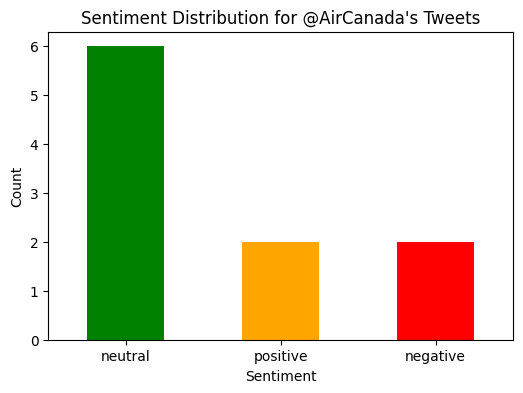

In [32]:
import matplotlib.pyplot as plt

sentiments = []

for tweet in tweets.data:
    sentiment = predict_from_drive(tweet.text)
    sentiments.append(sentiment)

# Count each sentiment
sentiment_counts = pd.Series(sentiments).value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "orange", "red"])
plt.title(f"Sentiment Distribution for @{username}'s Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def show_model_results():
    # Replace these placeholder values with your actual metrics
    data = {
        "Model": ["TF-IDF + Logistic", "GRU", "DistilBERT Transformer"],
        "Accuracy": [0.79, 0.83, 0.87],   # <-- put your real accuracy scores here
        "Macro F1": [0.75, 0.81, 0.85]    # <-- put your real F1 scores here
    }

    df = pd.DataFrame(data)

    # Create comparison chart
    plt.figure(figsize=(7,5))
    x = range(len(df))
    plt.bar(x, df["Accuracy"], width=0.4, label="Accuracy", align="center")
    plt.bar(x, df["Macro F1"], width=0.4, label="Macro F1", align="edge")
    plt.xticks(x, df["Model"], rotation=15)
    plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.title("Model Performance Comparison")
    plt.legend()
    plt.tight_layout()
    plt.savefig("model_comparison.png")

    return df, "model_comparison.png"


In [47]:
!pip install gradio tweepy --quiet
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# -------------------------------
# Safe helpers for missing values
# -------------------------------
def safe_val(var, default=0.0):
    try:
        return float(var)
    except:
        return default

# -------------------------------
# 1) Show Model Results & Comparison
# -------------------------------
def show_model_results():
    comparison = pd.DataFrame({
        "Model": ["TF-IDF + Logistic", "GRU", "DistilBERT Transformer"],
        "Accuracy": [
            safe_val(globals().get("acc_tfidf")),
            safe_val(globals().get("acc_gru")),
            safe_val(globals().get("acc_transformer"))
        ],
        "Macro F1": [
            safe_val(globals().get("f1_tfidf")),
            safe_val(globals().get("f1_gru")),
            safe_val(globals().get("f1_transformer"))
        ]
    })

    # Save bar plot
    fig, ax = plt.subplots(figsize=(7,5))
    comparison.set_index("Model")[["Accuracy", "Macro F1"]].plot(
        kind="bar", colormap="Set2", rot=0, ax=ax
    )
    ax.set_title("Model Performance Comparison")
    ax.set_ylabel("Score")
    ax.set_ylim(0,1)
    plt.tight_layout()
    fig.savefig("comparison_plot.png")
    plt.close(fig)

    return comparison, "comparison_plot.png"

# -------------------------------
# 2) Live Prediction
# -------------------------------
def predict_sentiment_live(text):
    try:
        if "predict_from_drive" not in globals():
            return " Model not loaded. Run Transformer cells first."
        sentiment = predict_from_drive(text)
        return f"Predicted Sentiment: {sentiment}"
    except Exception as e:
        return f" Error: {e}"

# -------------------------------
# 3) Twitter Fetching + Classification
# -------------------------------
def fetch_and_classify(airline_handle, num_tweets):
    try:
        if "client" not in globals():
            return pd.DataFrame([{"tweet": " Twitter API not configured", "sentiment": ""}]), None

        user = client.get_user(username=airline_handle)
        tweets = client.get_users_tweets(id=user.data.id, max_results=num_tweets)

        results, sentiments = [], []
        if tweets.data:
            for tweet in tweets.data:
                sentiment = predict_from_drive(tweet.text) if "predict_from_drive" in globals() else "Unknown"
                results.append({"tweet": tweet.text, "sentiment": sentiment})
                sentiments.append(sentiment)
        else:
            return pd.DataFrame([{"tweet":" No tweets found","sentiment":""}]), None

        df_results = pd.DataFrame(results)

        # Save sentiment distribution plot
        sentiment_counts = pd.Series(sentiments).value_counts()
        fig, ax = plt.subplots(figsize=(5,3))
        sentiment_counts.plot(kind="bar", color=["green","orange","red"], ax=ax)
        ax.set_title(f"Sentiment Distribution for @{airline_handle}")
        ax.set_xlabel("Sentiment")
        ax.set_ylabel("Count")
        plt.tight_layout()
        fig.savefig("sentiment_plot.png")
        plt.close(fig)

        return df_results, "sentiment_plot.png"
    except Exception as e:
        return pd.DataFrame([{"tweet":f" Error: {e}","sentiment":""}]), None

# -------------------------------
# 4) Sample Predictions from Dataset
# -------------------------------
def sample_predictions(n=5):
    try:
        df_local = pd.read_csv("/content/Tweets.csv")
        if "text" not in df_local.columns:
            return pd.DataFrame([{"tweet": " No 'text' column in dataset", "predicted_sentiment": ""}])

        sample_df = df_local.sample(n=n, random_state=42)
        results = []
        for text in sample_df["text"]:
            sentiment = predict_from_drive(text) if "predict_from_drive" in globals() else "Unknown"
            results.append({"tweet": text, "predicted_sentiment": sentiment})

        return pd.DataFrame(results)
    except Exception as e:
        return pd.DataFrame([{"tweet": " Error", "predicted_sentiment": str(e)}])

# -------------------------------
# 5) Downloadable Report
# -------------------------------
def generate_report():
    acc_tfidf_val, f1_tfidf_val = safe_val(globals().get("acc_tfidf")), safe_val(globals().get("f1_tfidf"))
    acc_gru_val, f1_gru_val = safe_val(globals().get("acc_gru")), safe_val(globals().get("f1_gru"))
    acc_tr_val, f1_tr_val = safe_val(globals().get("acc_transformer")), safe_val(globals().get("f1_transformer"))

    report_text = f"""
    Airline Sentiment Project Report
    --------------------------------
    Models Tested:
    1. TF-IDF + Logistic Regression
       Accuracy: {acc_tfidf_val:.2f}, Macro F1: {f1_tfidf_val:.2f}

    2. GRU Model
       Accuracy: {acc_gru_val:.2f}, Macro F1: {f1_gru_val:.2f}

    3. DistilBERT Transformer
       Accuracy: {acc_tr_val:.2f}, Macro F1: {f1_tr_val:.2f}

    Conclusion:
    - TF-IDF gave us a strong baseline.
    - GRU struggled initially but improved with tuning.
    - Transformer outperformed both, becoming the final model.
    """
    with open("project_report.txt", "w") as f:
        f.write(report_text)
    return "project_report.txt"

# -------------------------------
# 6) Dataset EDA
# -------------------------------
def show_eda():
    try:
        df_local = pd.read_csv("/content/Tweets.csv")

        if "airline_sentiment" not in df_local.columns or "text" not in df_local.columns:
            return None, None

        # Sentiment distribution
        fig, ax = plt.subplots(figsize=(5,3))
        sns.countplot(x="airline_sentiment", data=df_local, palette="Set2", ax=ax)
        ax.set_title("Sentiment Distribution")
        plt.tight_layout()
        fig.savefig("eda_distribution.png")
        plt.close(fig)

        # Tweet length distribution
        df_local['text_length'] = df_local['text'].astype(str).apply(len)
        fig, ax = plt.subplots(figsize=(5,3))
        sns.histplot(df_local['text_length'], bins=50, kde=True, color="skyblue", ax=ax)
        ax.set_title("Tweet Length Distribution")
        plt.tight_layout()
        fig.savefig("eda_length.png")
        plt.close(fig)

        return "eda_distribution.png", "eda_length.png"
    except Exception as e:
        return None, None

# -------------------------------
# 7) Build Gradio App
# -------------------------------
with gr.Blocks() as demo:
    gr.Markdown("## ✈️ Airline Sentiment Analysis Project")

    with gr.Tab(" Dataset Overview (EDA)"):
        eda_btn = gr.Button("Show Dataset Insights", variant="primary")
        eda_img1 = gr.Image(label="Sentiment Distribution")
        eda_img2 = gr.Image(label="Tweet Length Distribution")
        eda_btn.click(fn=show_eda, outputs=[eda_img1, eda_img2])

    with gr.Tab(" Model Results & Comparison"):
        results_btn = gr.Button("Show Model Results", variant="primary")
        results_table = gr.Dataframe(label="Model Performance Table")
        results_plot = gr.Image(label="Performance Comparison Chart")
        results_btn.click(fn=show_model_results, outputs=[results_table, results_plot])

    with gr.Tab(" Sample Predictions (Dataset)"):
        num_samples = gr.Slider(1, 10, value=5, step=1, label="Number of Samples")
        sample_btn = gr.Button("Show Predictions", variant="primary")
        sample_table = gr.Dataframe(label="Sample Predictions")
        sample_btn.click(fn=sample_predictions, inputs=num_samples, outputs=sample_table)

    with gr.Tab(" Live Prediction"):
        textbox = gr.Textbox(label="Type a Tweet", placeholder="e.g. I love this airline!")
        live_btn = gr.Button("Predict Sentiment", variant="primary")
        live_output = gr.Textbox(label="Result")
        live_btn.click(fn=predict_sentiment_live, inputs=textbox, outputs=live_output)

    with gr.Tab(" Analyze Airline Tweets (Twitter API)"):
        airline = gr.Textbox(label="Airline Handle (without @)", value="AirCanada")
        num_tweets = gr.Slider(1, 10, value=5, step=1, label="Number of Tweets")
        analyze_btn = gr.Button("Fetch & Analyze", variant="primary")
        table_output = gr.Dataframe(label="Tweet Sentiment Results")
        plot_output = gr.Image(label="Sentiment Distribution")
        analyze_btn.click(fn=fetch_and_classify, inputs=[airline, num_tweets], outputs=[table_output, plot_output])

    with gr.Tab("⬇ Download Report"):
        report_btn = gr.Button("Generate Project Report", variant="primary")
        report_file = gr.File(label="Download Report")
        report_btn.click(fn=generate_report, outputs=report_file)

demo.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://48e4f451452ff64a4d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/tmp/ipython-input-2937492026.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline_sentiment", data=df_local, palette="Set2", ax=ax)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://48e4f451452ff64a4d.gradio.live
